Custom Coefficients:
[39.730639517767955, 0.9729974518460569]

Scikit-learn Coefficients:
[39.730639517767706, 0.9729974518460582]


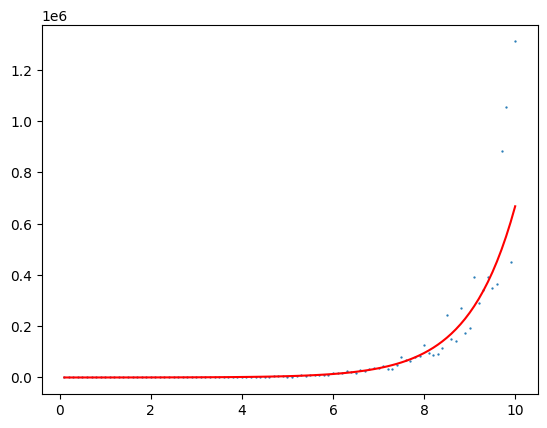

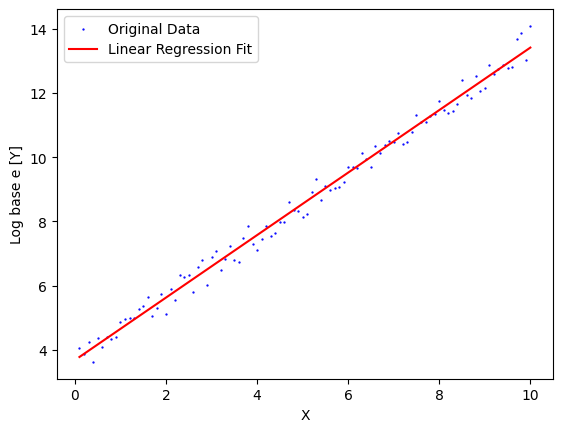

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score


def transpose(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

def multiply_matrices(A, B):
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

def invert_matrix(matrix):
    n = len(matrix)

    identity = [[0] * n for _ in range(n)]
    for i in range(n):
        identity[i][i] = 1

    for col in range(n):
        diagonal_element = matrix[col][col]
        for j in range(n):
            matrix[col][j] /= diagonal_element
            identity[col][j] /= diagonal_element

        for i in range(n):
            if i != col:
                factor = matrix[i][col]
                for j in range(n):
                    matrix[i][j] -= factor * matrix[col][j]
                    identity[i][j] -= factor * identity[col][j]

    return identity

def linear_regression_matrix_inverse(X, y):
    X_b = [[1] + row for row in X]

    X_transpose = transpose(X_b)
    XTX_inv = invert_matrix(multiply_matrices(X_transpose, X_b))
    XTY = multiply_matrices(X_transpose, [[np.log(yi)] for yi in y])  

    beta = multiply_matrices(XTX_inv, XTY)

    return [entry[0] for entry in beta]

def regression_equation(coefficients):
    degree = len(coefficients) - 1
    equation = f"log(y) = {coefficients[0]:.4f}"
    for i in range(1, degree + 1):
        equation += f" + {coefficients[i]:.4f} * X^{i}"  
    return equation

file_path = 'Data2.csv' 
with open(file_path, 'r') as file:
    reader = csv.reader(file)

    header = next(reader, None)

    data = []
    for row in reader:
        try:
            data.append(list(map(float, row)))
        except ValueError as e:
            print(f"Skipping row {row}: {e}")

X = [row[:-1] for row in data]
y = [row[-1] for row in data]

coefficients_custom = linear_regression_matrix_inverse(X, y)

X_sklearn = np.array(X)
y_sklearn = np.array(y)
reg_sklearn = LinearRegression().fit(X_sklearn, np.log(y_sklearn))  

coefficients_custom_exp = [np.exp(coefficients_custom[0])] + coefficients_custom[1:]

print("Custom Coefficients:")
print(coefficients_custom_exp)

print("\nScikit-learn Coefficients:")
print([np.exp(reg_sklearn.intercept_)] + list(reg_sklearn.coef_))
# Plotting
X_range = np.linspace(min(X_sklearn), max(X_sklearn), 100).reshape(-1, 1)
y_pred_custom_plot = [np.exp(coefficients_custom[0]) * np.exp(coefficients_custom[1] * x[0]) for x in X_range]
plt.plot(X_range, y_pred_custom_plot, color='red', label="Custom Regression Line")
plt.scatter(X, y, s=0.4, )
# plt.plot(X, predicted_Y)
plt.show()


plt.scatter(X_sklearn, np.log(y_sklearn), s=0.4, color='blue', label='Original Data')
plt.plot(X_sklearn, reg_sklearn.predict(X_sklearn), color='red', label='Linear Regression Fit')




# plt.tick_params(left = False, bottom = False)
plt.xlabel('X')
plt.ylabel('Log base e [Y]')
plt.legend()
plt.show()


In [3]:
L =[]
for i in y:
    k = np.log(i) 
    L.append(k)


In [4]:
#Using linear Regression which is build by SkLearn.
regr = LinearRegression()

x_array = np.array(X).reshape(-1, 1)
y_array = np.array(L).reshape(-1, 1)
regr.fit(x_array,y_array)
print("beta: ",regr.coef_)
alpha = np.exp(regr.intercept_)
print("alpha: ", alpha)

beta:  [[0.97299745]]
alpha:  [39.73063952]


In [5]:
y_pred_array = regr.predict(x_array)

mae = mean_absolute_error(y_true=y_array,y_pred=y_pred_array)
mse = mean_squared_error(y_true=y_array,y_pred=y_pred_array)
rmse = root_mean_squared_error(y_true=y_array,y_pred=y_pred_array)
r_square = r2_score(y_array, y_pred_array)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r_square:", r_square)

MAE: 0.23498835289025738
MSE: 0.07643342704351966
RMSE: 0.27646596000867746
r_square: 0.9904038522690993
